### Plot the embeddings of multiple integrations of Chen + X at the same time

In [1]:

import scIB
import numpy as np
import scanpy as sc
# ls -ltrh /storage/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/integration_march_2021/input/input*_cells.h5ad
import os
from os.path import exists, join
from os import makedirs, listdir
import pandas as pd
# ad = sc.read_h5ad('/home/icb/ignacio.ibarra/theislab/scIB_output/retinal_all_batch_donor_dataset_cell.type/prepare/unscaled/HVG.2K/adata_pre.h5ad')
# ad.shape
### here we write a version of the script in where we are sampling Chen_a/b/c

/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
import anndata
from os.path import abspath
from os.path import basename

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.dpi'] = 150

In [ ]:
basedir = '/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/integration_march_2021/output'
for d in listdir(basedir):
    if 'retinal_all_' in d:
        if not os.path.isdir(join(basedir, d)):
            continue
        p = join(basedir, d)
        
        for method in ['scvi_embed.csv', 'scgen_full.csv', 'scanvi_embed.csv']:
            embed_path = join(p, 'embeddings', 'unscaled', 'HVG.1K', method)
            print(d, exists(embed_path), basename(embed_path))
            print(abspath(embed_path))
            continue
        

### Dataset permutations

In [6]:
basedir = '/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/integration_march_2021/output/retinal_all_all_batch_donor_dataset_cell.type/integration/unscaled/HVG.1K'
queries = []
for f in listdir(basedir):
    if not 'scvi_2000000_25' in f or not '.csv' in f:
        continue
    dataset_names = ['Hackney', 'Hafler', 'Roska', 'Wong', 'Scheetz', 'Sanes']
    
    for dataset in dataset_names:
        if not dataset in f:
            continue
        queries.append([dataset, f, ])
    continue
    if 'retinal_all_' in d:
        if not os.path.isdir(join(basedir, d)):
            continue
        # print(d)
        p = join(basedir, d)
        
        for method in ['scvi_embed.csv', 'scgen_full.csv', 'scanvi_embed.csv']:
            embed_path = join(p, 'embeddings', 'unscaled', 'HVG.1K', method)

            print(d, exists(embed_path), basename(embed_path))

            if not exists(embed_path):
                continue      
                
            continue
            # print(exists(png_path), embed_path)
            # ax = plt.subplot(1, 2, 1)
            # embed = pd.read_csv(embed_path, nrows=1000)
            embed = pd.read_csv(embed_path)

            print(embed.shape)
            ad = anndata.AnnData(obs=embed)
            sc.set_figure_params(facecolor='white')
            ad.obsm['X_umap'] = ad.obs[['UMAP1', 'UMAP2']].to_numpy()

            query_name = basename(d).split('_')[2]
            n_cells = "+".join(map(str, ad.obs['batch_donor_dataset'].str.split('_').str[0].value_counts().values))
            sc.pl.embedding(ad, 'X_umap', title=query_name + '\n' + method + '\n' + n_cells, color='cell.type')
        print('\n\n')
        

In [7]:
# grp.drop_duplicates('filename')

Roska (25, 3)
0 scvi_2000000_25_Roska_Sanes_embed.csv


... storing 'cell.type' as categorical
... storing 'batch_donor_dataset' as categorical


1 scvi_2000000_25_Roska_Wong_Sanes_embed.csv


KeyboardInterrupt: 

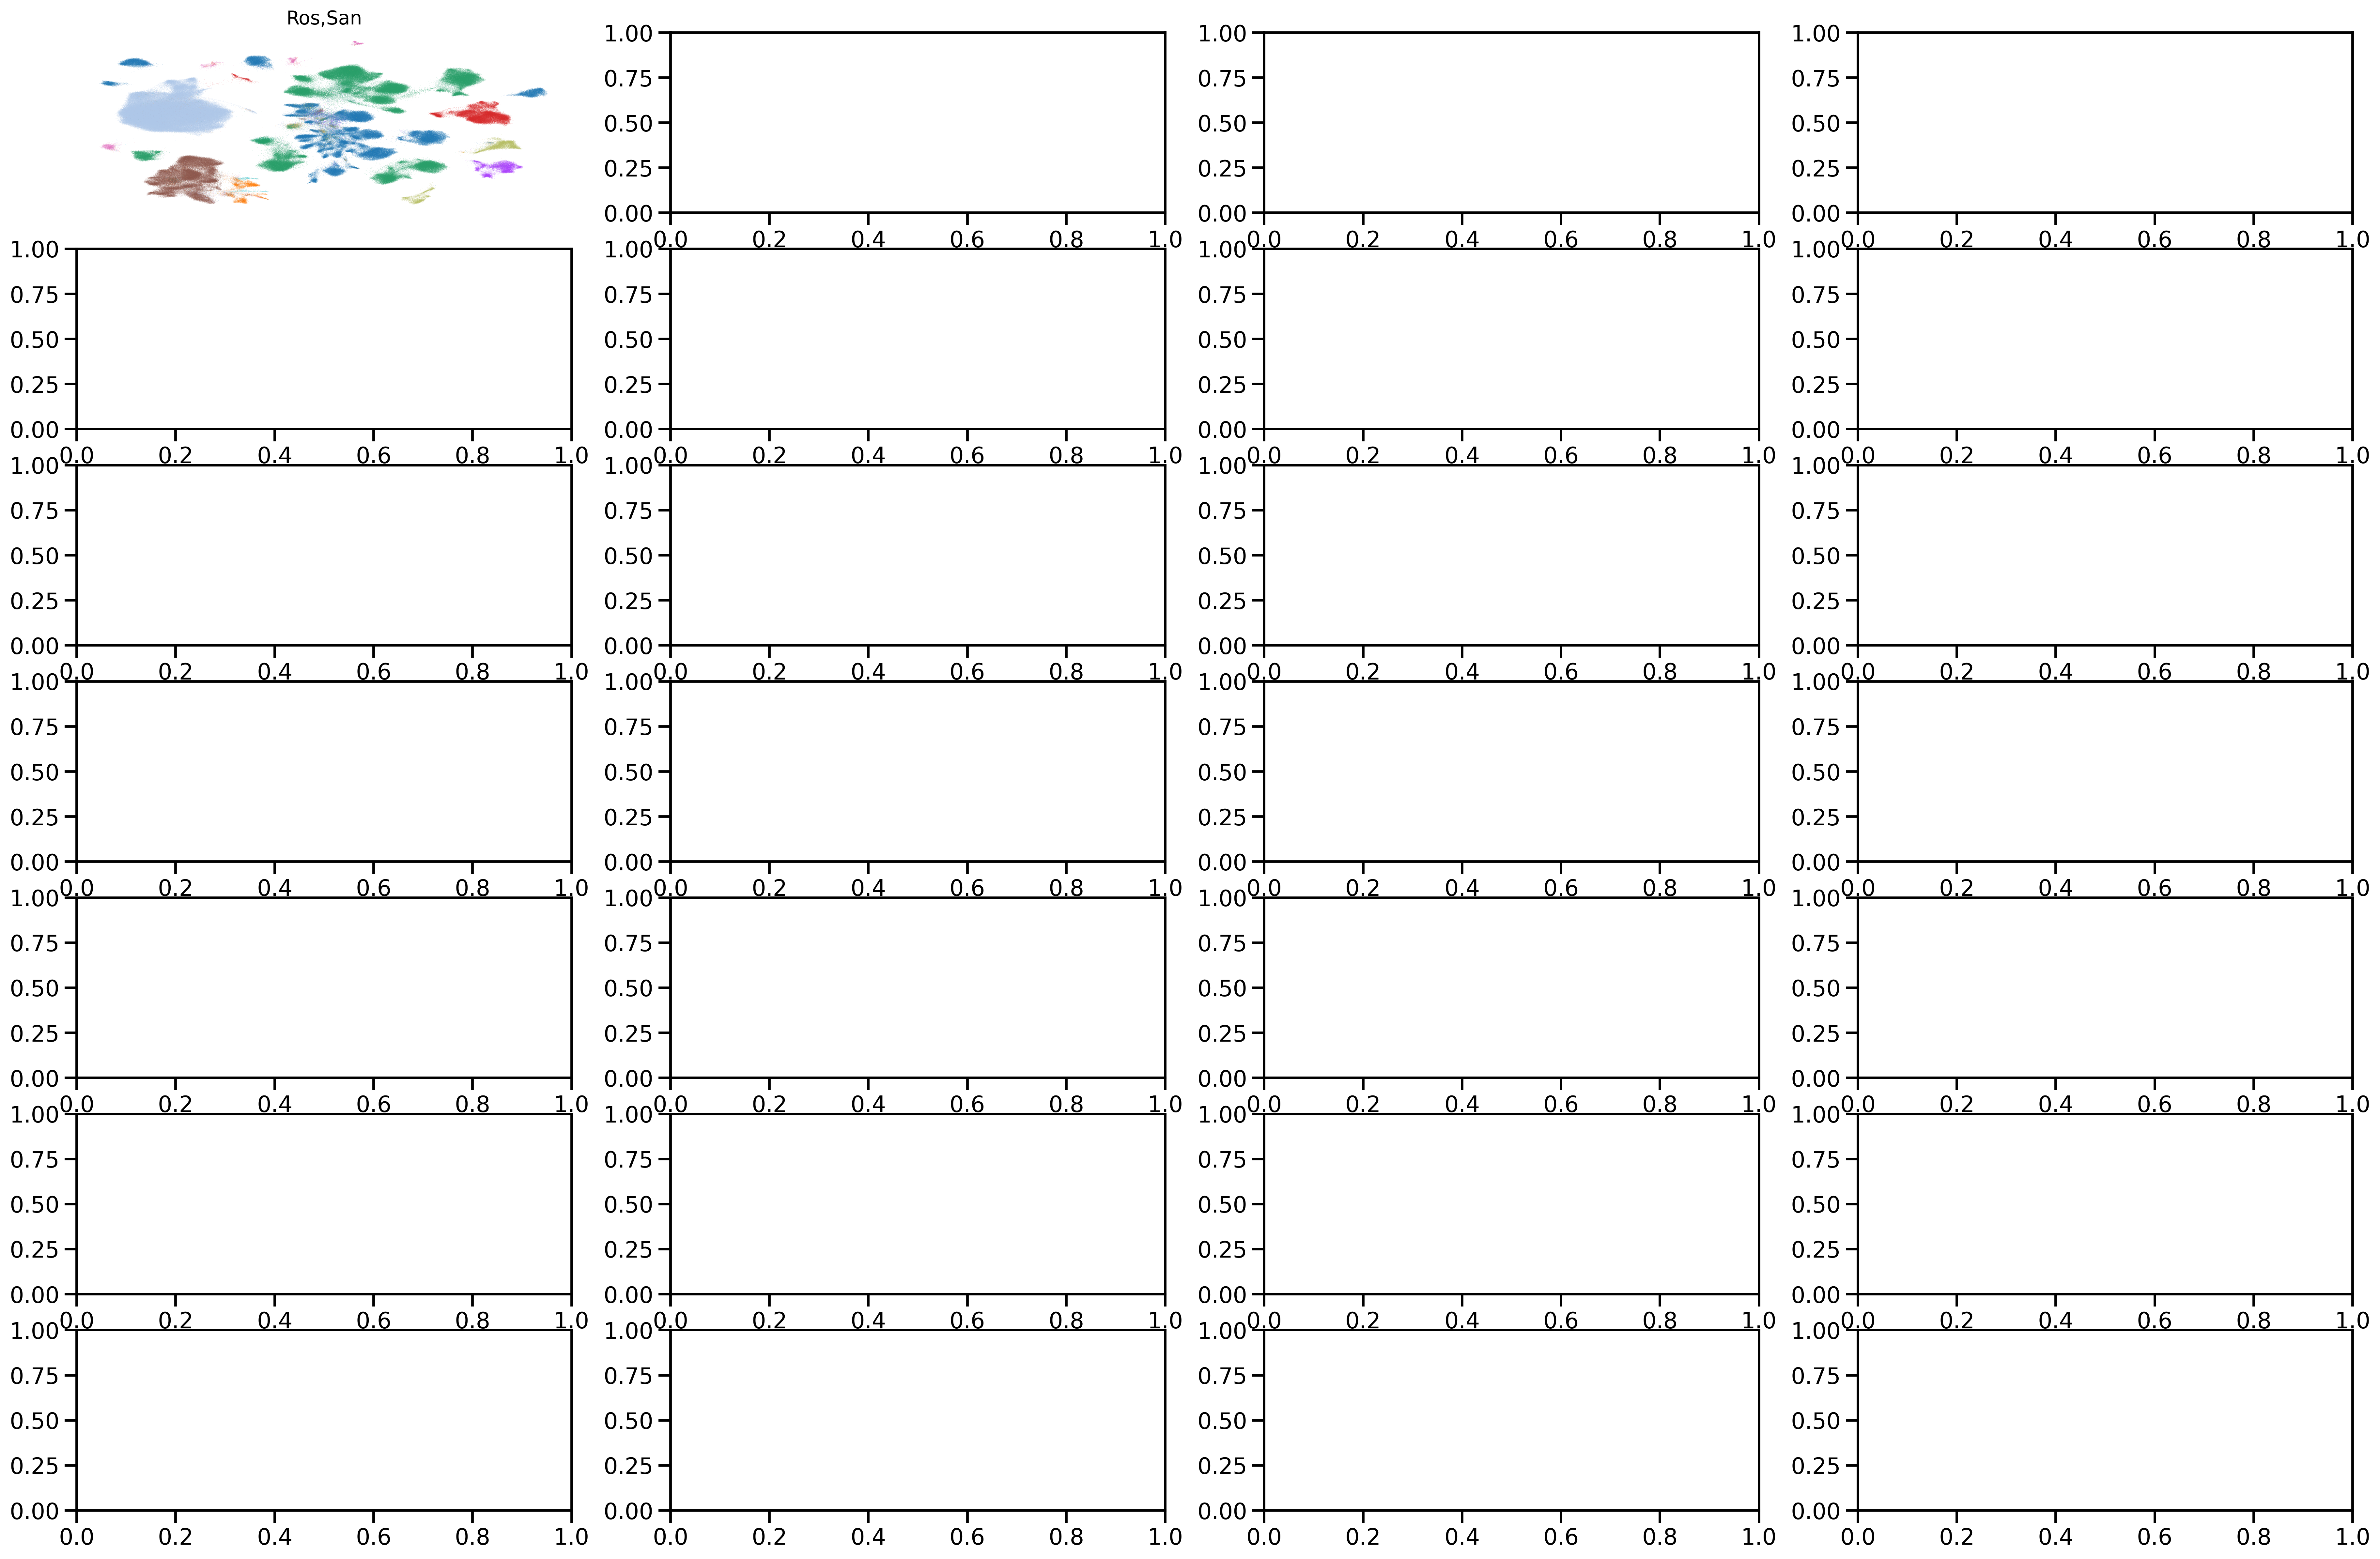

In [8]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 30, 20
rcParams['figure.dpi'] = 150

df = pd.DataFrame(queries, columns=['dataset', 'filename'])
df['n.dataset'] = df.filename.str.replace('scvi_2000000_25_', '').str.replace('_embed.csv', '').str.split('_').str.len()


for dataset, grp in df.groupby('dataset'):
    if dataset != 'Roska':
        continue
    grp = grp.sort_values('n.dataset', ascending=True)
    print(dataset, grp.shape)

    ncols = 4
    fig, ax = plt.subplots(nrows = int(grp.shape[0] / ncols) + 1, ncols=ncols)
    ax = ax.flatten()
    
    n_sample = None # 2000
    for ei, embed_filename in enumerate(grp['filename']):
        print(ei, embed_filename)
        embed_path = join(basedir, embed_filename)
        embed = pd.read_csv(embed_path, nrows=n_sample)
        
        ad = anndata.AnnData(obs=embed.head(n_sample) if n_sample is not None else embed)
        sc.set_figure_params(facecolor='white')
        ad.obsm['X_umap'] = ad.obs[['UMAP1', 'UMAP2']].to_numpy()
        # query_name = basename(d).split('_')[2]
        # n_cells = "+".join(map(str, ad.obs['batch_donor_dataset'].str.split('_').str[0].value_counts().values))
        
        title = ",".join([s[:3] for s in embed_filename.replace('scvi_2000000_25_', '').replace('_embed.csv', '').split('_')])
        sc.pl.embedding(ad, 'X_umap', color='cell.type', ax=ax[ei], show=ei + 1 == grp.shape[0],
                       legend_loc=None, frameon=False, title=title)
        

    break

### Check the 7 + x combinations so far generated

In [10]:
import os
from os import listdir
basedir = '/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/integration_march_2021/output/retinal_all_all_batch_donor_dataset_cell.type/integration/unscaled/HVG.1K'

for f in listdir(basedir):
    if not '.png' in f:
        continue
    if not 'scvi_None_25' in f:
        continue
    datasets = set(f.replace('scvi_None_25_', '').replace('.png', '').split('_'))
    if len(datasets) < 5:
        continue
    print(len(datasets), datasets, f)


7 {'NROSKA', 'Sanes', 'Roska', 'Scheetz', '150000', 'Wong', 'Hafler'} scvi_None_25_Hafler_Roska_Sanes_Scheetz_Wong_NROSKA_150000.png
7 {'NROSKA', '125000', 'Sanes', 'Roska', 'Scheetz', 'Wong', 'Hafler'} scvi_None_25_Hafler_Roska_Sanes_Scheetz_Wong_NROSKA_125000.png
5 {'Sanes', 'Scheetz', 'Hackney', 'Wong', 'Hafler'} scvi_None_25_Wong_Hackney_Hafler_Sanes_Scheetz.png
5 {'Sanes', 'Scheetz', 'Hackney', 'Wong', 'Hafler'} scvi_None_25_Hackney_Sanes_Wong_Hafler_Scheetz.png
7 {'NROSKA', 'Sanes', '175000', 'Roska', 'Scheetz', 'Wong', 'Hafler'} scvi_None_25_Hafler_Roska_Sanes_Scheetz_Wong_NROSKA_175000.png
7 {'NROSKA', 'Sanes', 'Roska', 'Scheetz', 'Wong', 'Hafler', '100000'} scvi_None_25_Hafler_Roska_Sanes_Scheetz_Wong_NROSKA_100000.png
5 {'Sanes', 'Scheetz', 'Hackney', 'Wong', 'Hafler'} scvi_None_25_Hafler_Hackney_Sanes_Scheetz_Wong.png
7 {'NROSKA', 'Sanes', '0', 'Roska', 'Scheetz', 'Wong', 'Hafler'} scvi_None_25_Hafler_Roska_Sanes_Scheetz_Wong_NROSKA_0.png
7 {'NROSKA', '75000', 'Sanes', 'Rosk

### Attempt PAGA in an integrated sample.

In [11]:
data_dir = '/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration'

In [12]:
# print(exists(png_path), embed_path)
# ax = plt.subplot(1, 2, 1)
# embed = pd.read_csv(embed_path, nrows=1000)
embed_path = join(data_dir, 'data/integration_march_2021/output/retinal_all_Chen+Hackney_batch_donor_dataset_cell.type/embeddings/unscaled/HVG.1K/scanvi_embed.csv')
adata_path = join(data_dir, 'data/integration_march_2021/output/retinal_all_Chen+Hackney_batch_donor_dataset_cell.type/integration/unscaled/HVG.1K/scanvi.h5ad')
embed = pd.read_csv(embed_path)

print(embed.shape)
# ad = anndata.AnnData(obs=embed)
sc.set_figure_params(facecolor='white')


(1907304, 5)


In [13]:
adata = sc.read_h5ad(adata_path)

In [32]:
ad_embed = anndata.AnnData(obs=embed)
adata.obsm['X_umap'] = ad_embed.obs[['UMAP1', 'UMAP2']].to_numpy()

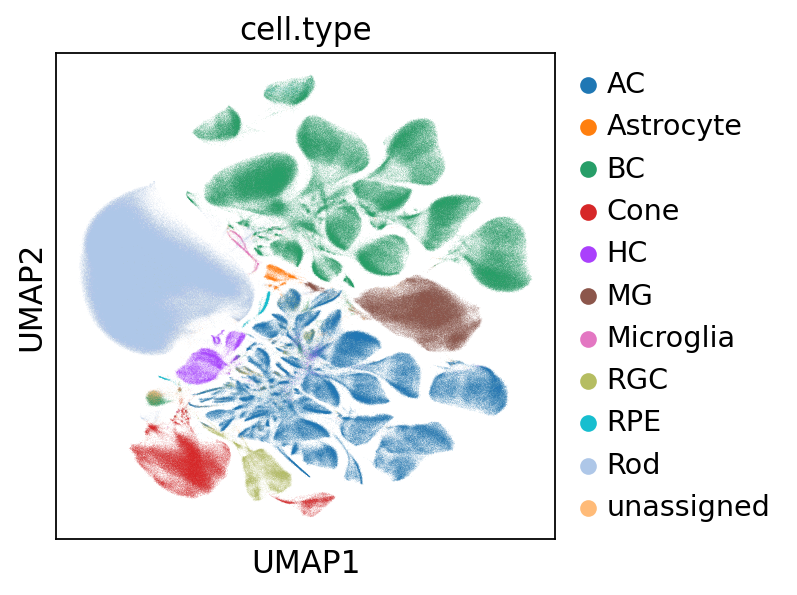

In [33]:
sc.pl.umap(adata, color='cell.type')

In [ ]:
assert ad_embed.shape[0] == adata.shape[0]

In [ ]:
print(embed_path)

In [ ]:
adata.obsm['X_umap'] = ad_embed.obs[['UMAP1', 'UMAP2']].to_numpy()
query_name = basename(data_dir).split('_')[2]
n_cells = "+".join(map(str, adata.obs['batch_donor_dataset'].str.split('_').str[0].value_counts().values))

In [ ]:
adata

In [15]:
n_ac_and_bc = adata[adata.obs['cell.type'].isin({'AC', 'BC'}),:].obs_names.shape[0]
n_sample = 100000 # n_ac_and_bc # 100000
sample_idx = pd.Series(adata[adata.obs['cell.type'].isin({'AC', 'BC'}),:].obs_names).sample(n_sample, random_state=500)
ad = adata[adata.obs_names.isin(sample_idx),:]
ad.shape



(100000, 1000)

In [16]:
sc.pp.neighbors(ad)
sc.tl.leiden(ad)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [17]:
ad.obs['k.paga'] = ad.obs['cell.type'].astype(str) + ':' + ad.obs['leiden'].astype(str)


In [19]:
# sc.pl.umap(ad, color=['cell.type', 'k.paga'])

In [20]:

import scvelo as scv

In [21]:
# this is needed due to a current bug - bugfix is coming soon.
ad.uns['neighbors']['distances'] = ad.obsp['distances']
ad.uns['neighbors']['connectivities'] = ad.obsp['connectivities']

# scv.tl.paga(ad, groups='cell.type')
sc.tl.paga(ad, groups='k.paga')

In [72]:
df = scv.get_df(ad, 'paga/connectivities', precision=3).T
# df.style.background_gradient(cmap='Blues').format('{:.2g}')

In [73]:
df = df.reset_index().melt('index')
df.columns = columns=['a', 'b', 'value']

In [74]:
df['same'] = df['a'].str.split(':').str[0] == df['b'].str.split(':').str[0]
df['same'].value_counts()
df = df[df['a'].str.split(":").str[0].isin({'AC', "BC"}) & df['b'].str.split(":").str[0].isin({'AC', "BC"})]
# df[df['a'] != df['b']]

In [75]:
import seaborn as sns

In [83]:
df.sort_values('value', ascending=False).head(200)

,a,b,value,same
1421,BC:15,AC:25,1.000,False
4193,AC:18,BC:18,1.000,False
5431,AC:47,BC:47,1.000,False
4834,BC:6,BC:31,1.000,True
4836,BC:8,BC:31,1.000,True
...,...,...,...,...
5215,BC:7,BC:40,0.423,True
3335,BC:37,BC:3,0.409,True
5135,BC:3,BC:37,0.409,True
4850,BC:30,BC:31,0.402,True


In [30]:
# df[~df['same'] & (df['value'] != 0)]

In [78]:
# df.sort_values('value', ascending=False).head(50)

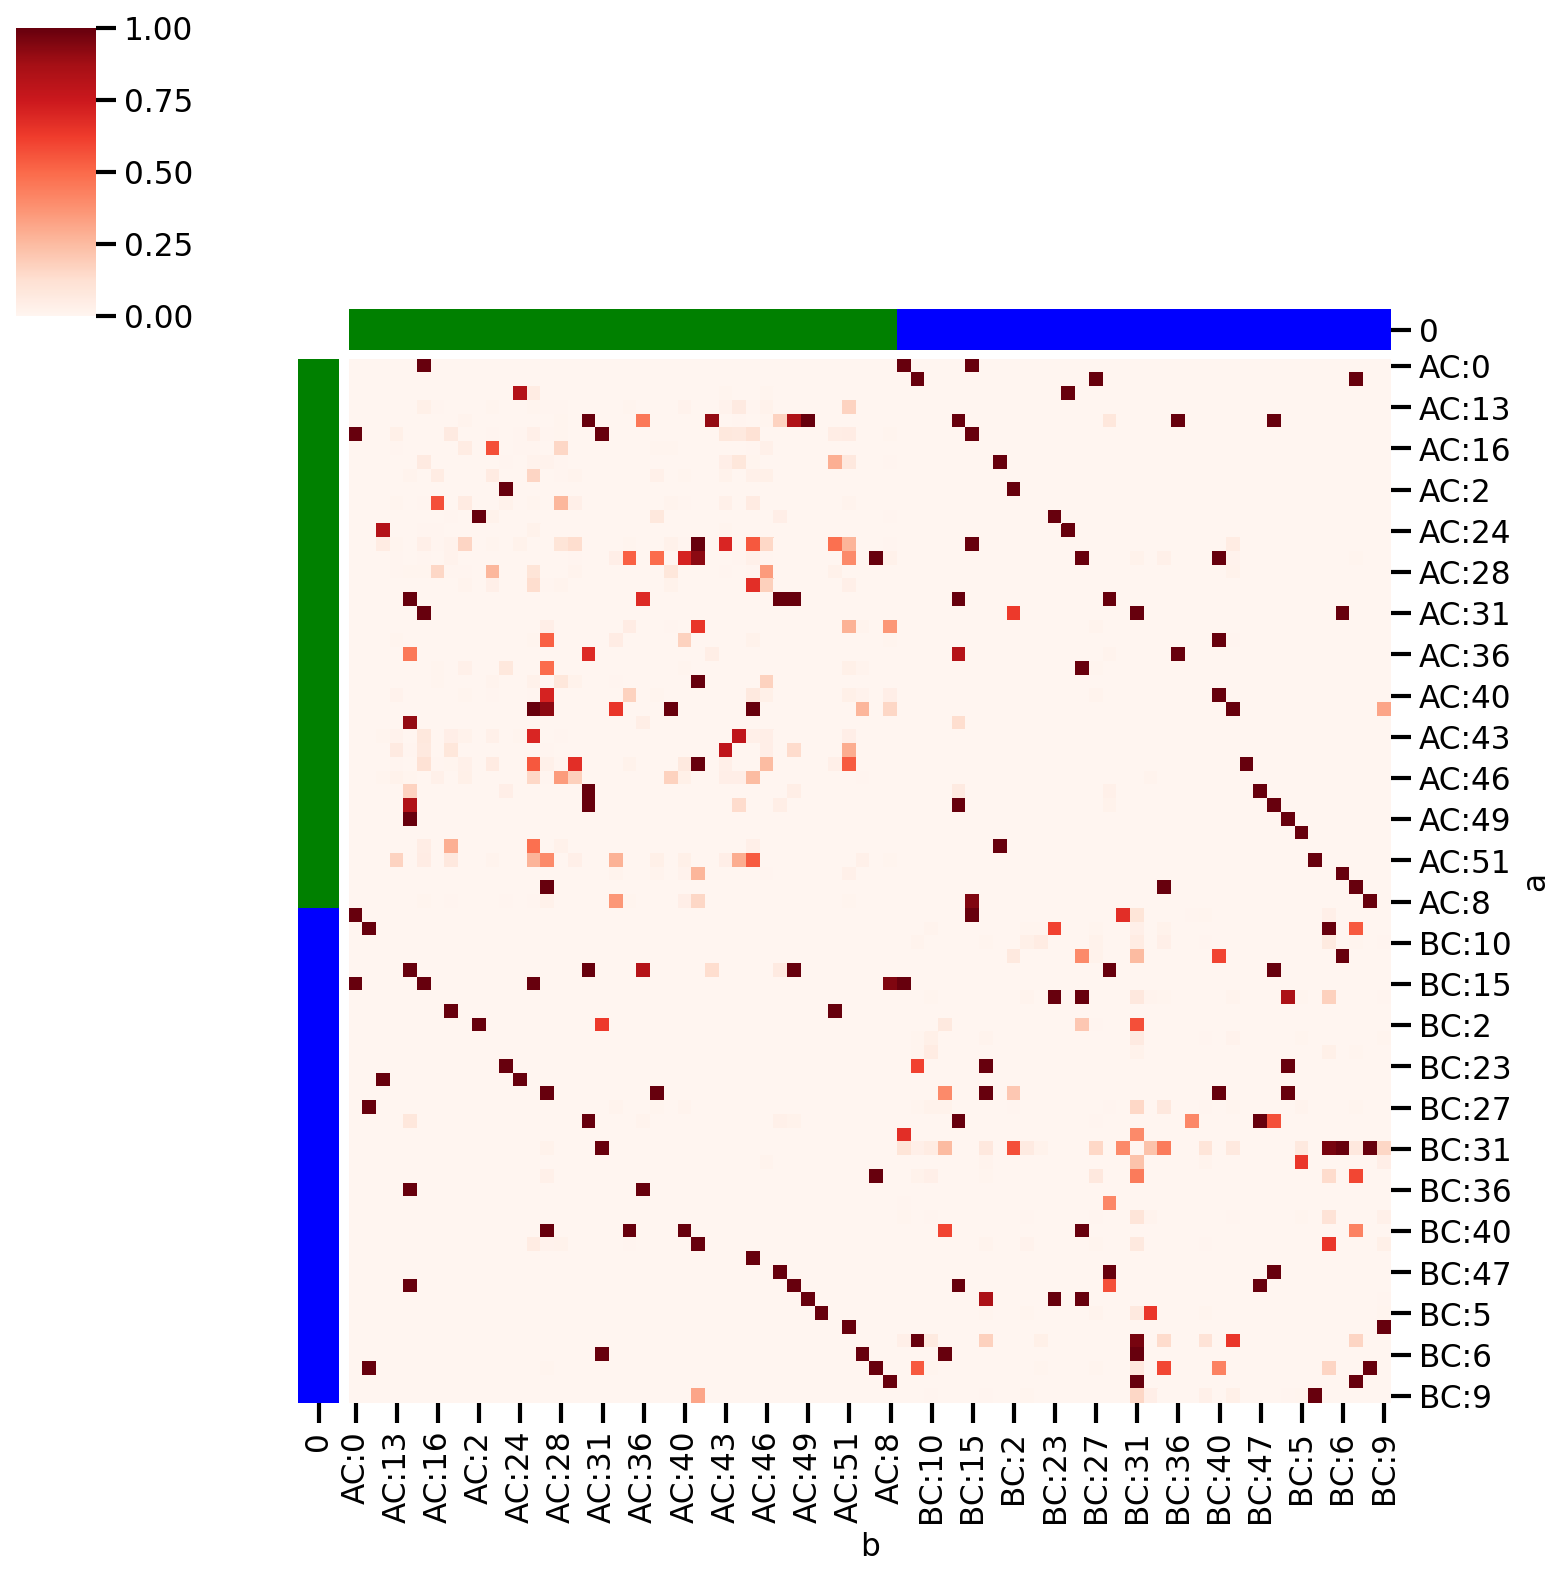

In [85]:
hm = df.pivot('a', 'b', 'value')
assert ((hm.index == hm.columns) == True).any()
index_sorted = hm.index.sort_values()
hm.reindex(index_sorted)
hm = hm[index_sorted]
row_colors = pd.DataFrame(np.where(hm.index.str.contains('AC'), 'green', 'blue'), index=hm.index)
sns.clustermap(hm, cmap='Reds', row_cluster=False, col_cluster=False, row_colors=row_colors, col_colors=row_colors)

In [95]:
grp

,a,b,value,same
3040,AC:0,BC:0,1.0,False
4028,AC:0,BC:15,1.0,False
836,AC:0,AC:15,1.0,True
3724,AC:0,BC:9,0.0,False
4180,AC:0,BC:18,0.0,False
...,...,...,...,...
1900,AC:0,AC:36,0.0,True
1824,AC:0,AC:34,0.0,True
1748,AC:0,AC:32,0.0,True
1672,AC:0,AC:31,0.0,True


2

In [127]:
df['type'] = df['a'].str.split(':').str[0]
for k, grp in df.groupby('type'):
    n_correct = 0
    for k2, grp2 in grp.groupby('a'):
        grp2 = grp2.sort_values('value', ascending=False)
        res = grp2[grp2['value'] == grp2['value'].max()]['b'].str.split(':').str[0].value_counts().to_dict()
        cell_type = k.split(':')[0]
        correct = cell_type in res and res[cell_type] == max(res.values())
        # print(cell_type, res, correct)
        n_correct += correct
    print(k, n_correct, 'out of', len(set(grp['a'])))


AC 21 out of 40
BC 23 out of 36


In [31]:
df[df['value'] != 0].groupby('same').describe()

value                                            
      count   mean   std    min    25%    50%  75%  max
same                                                   
False  33.0  1.000  0.00  1.000  1.000  1.000  1.0  1.0
True   42.0  0.686  0.36  0.056  0.364  0.847  1.0  1.0

In [ ]:
sns.boxplot(data=df, y='value', x='same')

In [ ]:
# sc.tl.paga(ad, groups='cell.type')

In [ ]:
# ad.uns['paga']['connectivities_tree']#=

In [ ]:
sc.tl.leiden(ad)

In [43]:
sc.pl.umap(ad)

AnnData object with n_obs × n_vars = 100000 × 1000
    obs: 'RNA_snn_res.0.8', 'batch', 'dataset', 'filename', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'scpred_AC', 'scpred_Astrocyte', 'scpred_BC', 'scpred_Cone', 'scpred_HC', 'scpred_MG', 'scpred_Microglia', 'scpred_RGC', 'scpred_RPE', 'scpred_Rod', 'scpred_max', 'scpred_prediction', 'seurat_clusters', 'size_factors', 'cell.type', 'batch.merged', 'donor', 'batch_donor_dataset', 'leiden', 'k.paga'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'neighbors', 'leiden', 'paga', 'k.paga_sizes', 'umap'
    obsm: 'X_emb', 'X_pca'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [44]:
sc.pl.umap(ad, color=['cell.type', 'leiden'])

KeyError: "Could not find entry in `obsm` for 'umap'.\nAvailable keys are: ['X_emb', 'X_pca']."

In [ ]:
ad.obs['k.paga'] = ad.obs['cell.type'].astype(str) + ':' + ad.obs['leiden'].astype(str)

# this is needed due to a current bug - bugfix is coming soon.
ad.uns['neighbors']['distances'] = ad.obsp['distances']
ad.uns['neighbors']['connectivities'] = ad.obsp['connectivities']

sc.tl.paga(ad, groups='k.paga')


from matplotlib import rcParams

In [ ]:
rcParams['figure.figsize'] = [10, 10]
rcParams['figure.dpi'] = 150

In [ ]:
rcParams['figure.figsize'] = [7, 7]
rcParams['figure.dpi'] = 125
sc.pl.paga(ad, color='cell.type', edge_width_scale=.05, fontsize=6, node_size_scale=.3) #  node_size_power=.3)

In [ ]:
sc.tl.umap(ad, init_pos="paga")

In [ ]:
sc.pl.umap(ad, color='cell.type') #  init_pos="paga")

### Attempt to do this with non clustered samples

In [ ]:
# print(exists(png_path), embed_path)
# ax = plt.subplot(1, 2, 1)
# embed = pd.read_csv(embed_path, nrows=1000)
data_dir = '/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration'
embed_path = join(data_dir, 'data/integration_march_2021/output/retinal_all_all_batch_donor_dataset_cell.type/integration/unscaled/HVG.1K',
                  'scanvi_None_20_Hafler_Roska_Sanes_Scheetz_Wong_NROSKA_125000_NEPOCHS_20_NLAYERS_3_NHIDDEN_256_embed.csv')
adata_path = join(data_dir, 'data/integration_march_2021/output/retinal_all_all_batch_donor_dataset_cell.type/integration/unscaled/HVG.1K',
                  'scanvi_None_20_Hafler_Roska_Sanes_Scheetz_Wong_NROSKA_125000_NEPOCHS_20_NLAYERS_3_NHIDDEN_256.h5ad')

print(exists(embed_path), embed_path)

embed = pd.read_csv(embed_path)

print(embed.shape)
# ad = anndata.AnnData(obs=embed)
sc.set_figure_params(facecolor='white')
print(embed.shape)

In [ ]:
adata = sc.read_h5ad(adata_path)

In [ ]:
ad_embed = anndata.AnnData(obs=embed)
adata.obsm['X_umap'] = ad_embed.obs[['UMAP1', 'UMAP2']].to_numpy()

In [ ]:
assert ad_embed.shape[0] == adata.shape[0]

In [ ]:
print(embed_path)

In [ ]:
adata.obsm['X_umap'] = adata.obs[['UMAP1', 'UMAP2']].to_numpy()
query_name = basename(d).split('_')[2]
n_cells = "+".join(map(str, adata.obs['batch_donor_dataset'].str.split('_').str[0].value_counts().values))

In [ ]:
adata

In [ ]:
n_sample = 50000
sample_idx = pd.Series(adata.obs_names).sample(n_sample, random_state=500)
ad = adata[adata.obs_names.isin(sample_idx),:]
ad.shape

In [ ]:
sc.pp.neighbors(ad)

In [ ]:
sc.tl.leiden(ad)

In [ ]:
sc.pl.umap(ad, color=['cell.type', 'leiden'])

In [ ]:
ad.obs['k.paga'] = ad.obs['cell.type'].astype(str) + ':' + ad.obs['leiden'].astype(str)

# this is needed due to a current bug - bugfix is coming soon.
ad.uns['neighbors']['distances'] = ad.obsp['distances']
ad.uns['neighbors']['connectivities'] = ad.obsp['connectivities']

sc.tl.paga(ad, groups='k.paga')

from matplotlib import rcParams

In [ ]:
print('here...')

In [ ]:
ad.uns['k.paga_sizes']

In [ ]:
df = scv.get_df(asel, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

In [ ]:
rcParams['figure.figsize'] = [20, 20]
rcParams['figure.dpi'] = 150

In [ ]:
# sc.pl.paga_compare(ad, color='cell.type', basis='umap')
#                    # fontsize=6, node_size_scale=.3, node_size_power=.3)

In [ ]:
rcParams['figure.figsize'] = [7, 7]
rcParams['figure.dpi'] = 125
sc.pl.paga(ad, color='cell.type', edge_width_scale=.05, fontsize=6) #  node_size_scale=.3) #  node_size_power=.3)

In [ ]:
sc.tl.umap(ad, init_pos="paga")

In [ ]:
sc.pl.umap(ad, color='cell.type') #  init_pos="paga")

## Subsample-based computation of metrics and their timings

In [ ]:
import scIB

In [ ]:
scIB.metrics.metrics()

In [ ]:
n_sample = 1000
sample_idx = pd.Series(adata.obs_names).sample(n_sample, random_state=500)
ad_integrated = adata[adata.obs_names.isin(sample_idx),:]
ad_integrated.shape

In [ ]:
adata_unintegrated_path = join('/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data',
                               'integration_march_2021/output/retinal_all_all_batch_donor_dataset_cell.type/prepare/unscaled/HVG.1K/adata_pre.h5ad')
adata_unintegrated = sc.read_h5ad(adata_unintegrated_path)

In [ ]:
adata_unintegrated.shape

In [ ]:
ad_unintegrated = adata_unintegrated[adata_unintegrated.obs_names.isin(sample_idx),:]


In [ ]:
sum(ad_integrated.obs_names == ad_unintegrated.obs_names) == ad_unintegrated.shape[0]

In [ ]:
scIB.metrics.metrics?

In [ ]:
ad_unintegrated.obs

In [ ]:
sc.tl.pca(ad_unintegrated)
sc.tl.pca(ad_integrated)

In [ ]:
scIB.metrics.metrics(
    adata=ad_unintegrated,
    adata_int=ad_integrated,
    batch_key='batch_donor_dataset',
    label_key='cell.type',
    hvg_score_=False,
    # cluster_key='cluster',
    # cluster_nmi='abc/test.csv',
    ari_=True,
    nmi_=True,
    nmi_method='arithmetic',
    nmi_dir='abc/test.csv',
    silhouette_=True,
    embed='X_pca',
    si_metric='euclidean',
    pcr_=True,
    # cell_cycle_=False,
    # cell_cycle_complex_=False,
#     organism='mouse',
    isolated_labels_=True,  # backwards compatibility
    # isolated_labels_f1_=False,
    # isolated_labels_asw_=False,
    n_isolated=None,
    graph_conn_=False,
    # kBET_=False,
    # subsample=0.5,
#     lisi_graph_=False,
#     ilisi_=False,
#     clisi_=False,
    trajectory_=False,
    type_=None,
    verbose=False,
)

### combine metrics from several dataframes

In [133]:
directory = '/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/integration_march_2021/output/retinal_500_Chen+Hackney_batch_donor_dataset_cell.type/metrics/unscaled/HVG.1K'
p1 = join(directory, 'scanvi_embed_silhouette.csv')
p2 = join(directory, 'scanvi_embed_graph_conn.csv')

df1 = pd.read_csv(p1, index_col=0)
df2 = pd.read_csv(p2, index_col=0)

In [140]:
pd.DataFrame(pd.concat([df1, df2], axis=1).max(axis=1), columns=df1.columns)

,scanvi_embed
NMI_cluster/label,NaN
ARI_cluster/label,NaN
ASW_label,0.675
ASW_label/batch,0.771
PCR_batch,NaN
cell_cycle_conservation,NaN
isolated_label_F1,NaN
isolated_label_silhouette,NaN
graph_conn,0.714
kBET,NaN


In [130]:
df1

,scanvi_embed
NMI_cluster/label,NaN
ARI_cluster/label,NaN
ASW_label,0.675
ASW_label/batch,0.771
PCR_batch,NaN
cell_cycle_conservation,NaN
isolated_label_F1,NaN
isolated_label_silhouette,NaN
graph_conn,NaN
kBET,NaN
